In [1501]:
#Programming_project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


<h3><b>Data Acquisition</b></h3>

In [1502]:
# Data acquisition
NY_dataset = pd.read_csv("C:\\Users\\alesi\\Desktop\\Programming\\Programming_project\\AB_NYC_2019.csv")

# First 5 rows of the DataFrame
NY_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0


In [1503]:
print('The number of rows is:', NY_dataset.shape[0])
print('The number of columns is:', NY_dataset.shape[1])

The number of rows is: 48895
The number of columns is: 16


Before we perform any analysis, we'll first see what our dataset looks like. These are the variables it contains:

- id: - id number that identifies the property
- name: - Property name
- host_id: - id number that identifies the host
- host_name: - Host name
- neighbourhood_group: - The main regions of the city
- neighbourhood: - The neighbourhoods
- latitude: - Property latitude
- longitude: - Property longitude
- room_type: - Type of the room
- price: - The price for one night
- minimum_nights: - Minimum amount of nights to book the place
- number_of_reviews: - Number of reviews received
- last_review: - Date of the last review
- reviews_per_month: - Amount of reviews per month
- calculated_host_listings_count: - Number of properties available on Airbnb owned by the host
- availability_365: - Number of days of availability within 365 days

In [1504]:
pd.set_option('display.float_format', '{:.3f}'.format)
NY_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.000,19017143.236,10983108.386,2539.000,9471945.000,19677284.000,29152178.500,36487245.000
host_id,48895.000,67620010.647,78610967.033,2438.000,7822033.000,30793816.000,107434423.000,274321313.000
latitude,48895.000,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48895.000,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
price,48895.000,152.721,240.154,0.000,69.000,106.000,175.000,10000.000
minimum_nights,48895.000,7.030,20.511,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48895.000,23.274,44.551,0.000,1.000,5.000,24.000,629.000
reviews_per_month,38843.000,1.373,1.680,0.010,0.190,0.720,2.020,58.500
calculated_host_listings_count,48895.000,7.144,32.953,1.000,1.000,1.000,2.000,327.000
availability_365,48895.000,112.781,131.622,0.000,0.000,45.000,227.000,365.000


In [1505]:
NY_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that the DataFrame has 48'895 rows and 16 columns.

<h3><b>Data Cleaning</b></h3>

In [1506]:
# Checking the presence of missing values
NY_dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see that there are 4 columns with missing values, but columns "name" and "host_name" and "last_review" are irrelevant to our data analysis and column "review_per_month" needs very simple handling.

We delete "name", "host_name" and "last_review" because are irrelevant in our analysis.

In [1507]:
NY_dataset.drop(['name', 'host_name', 'last_review'], axis=1, inplace=True)


The 'reviews_per_month' column provides insights into the average count of reviews on a monthly basis, a missing value means the item has 0 reviews per month.

In [1508]:
NY_dataset.fillna({'reviews_per_month': 0}, inplace=True)

In [1509]:
# Checking if we have deleted all the missing data
NY_dataset.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Checking if there are some rows duplicated

In [1510]:
NY_dataset[NY_dataset.duplicated()]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


There are no duplicates.

In [1511]:
NY_dataset.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,0.210,6,365
1,2595,2845,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,0.380,2,355
2,3647,4632,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,0.000,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,4.640,1,194
4,5022,7192,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,0.100,1,0


In [1512]:
print('The number of rows is:', NY_dataset.shape[0])
print('The number of columns is:', NY_dataset.shape[1])

The number of rows is: 48895
The number of columns is: 13


<h4><b>Outliers</b></h4>

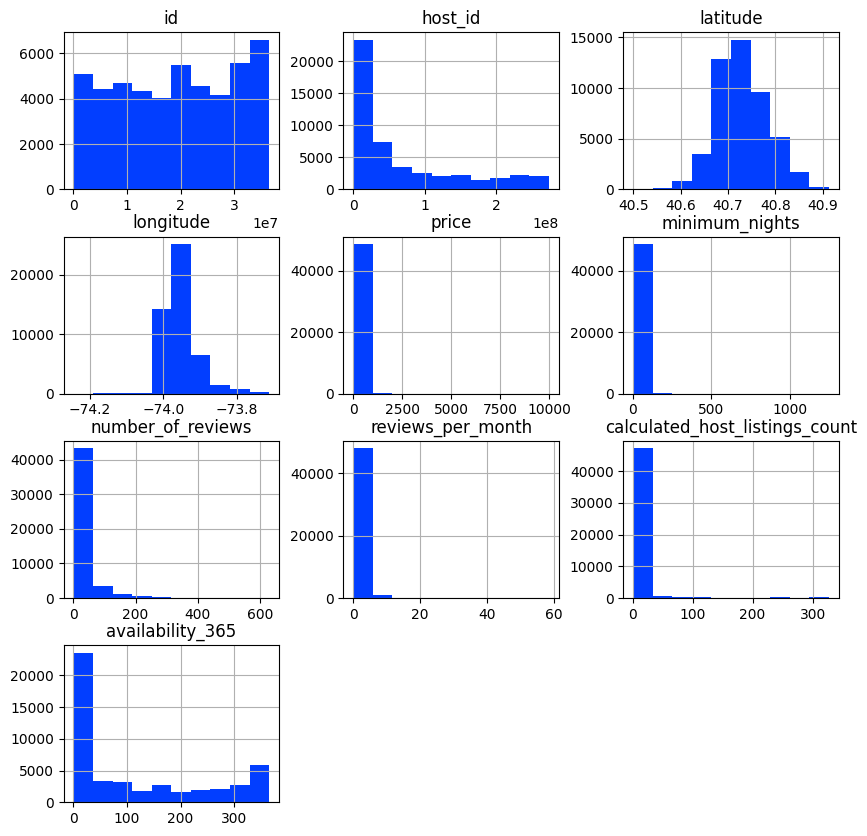

In [1513]:
NY_dataset.hist(figsize=(10,10))
plt.show()

In [1514]:
NY_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.000,19017143.236,10983108.386,2539.000,9471945.000,19677284.000,29152178.500,36487245.000
host_id,48895.000,67620010.647,78610967.033,2438.000,7822033.000,30793816.000,107434423.000,274321313.000
latitude,48895.000,40.729,0.055,40.500,40.690,40.723,40.763,40.913
longitude,48895.000,-73.952,0.046,-74.244,-73.983,-73.956,-73.936,-73.713
price,48895.000,152.721,240.154,0.000,69.000,106.000,175.000,10000.000
minimum_nights,48895.000,7.030,20.511,1.000,1.000,3.000,5.000,1250.000
number_of_reviews,48895.000,23.274,44.551,0.000,1.000,5.000,24.000,629.000
reviews_per_month,48895.000,1.091,1.597,0.000,0.040,0.370,1.580,58.500
calculated_host_listings_count,48895.000,7.144,32.953,1.000,1.000,1.000,2.000,327.000
availability_365,48895.000,112.781,131.622,0.000,0.000,45.000,227.000,365.000


Looking at this table and the histograms above, we can see that there are data points that are significantly different from other points in the dataset.
Here are some observations:
- 'price': The dataset shows an unusual distribution in terms of price values. Some listings have prices as high as 10'000 those are significantly above the 75th percentile. This wide price range contributes to a notable standard deviation.

- 'minimum_nights': An interesting observation is the presence of high values for the 'minimum_nights' column. There is a maximum of 1'250 nights that is significantly above the 75th percentile.

- 'number_of_reviews': While most listings seem to have a moderate number of reviews, there are a few with exceptionally high counts, reaching as high as 629 reviews. This number is significantly above the 75th percentile, indicating the existence of potential outliers.

- 'reviews_per_month': There are instances where the value reaches as high as 58.5 reviews per month. This is significantly above the 75th percentile, suggesting the likelihood of outliers.

- 'calculated_host_listings_count': The 'calculated_host_listings_count' column also shows indications of outliers. While most hosts have a reasonable number of listings, there are instances where the count goes as high as 327 listings. This value is significantly above the 75th percentile.

Now we are going to use the Z-score to identify and then remove outliers.

In [1515]:
# Select columns
NY_dataset_col = NY_dataset[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count' ]]

for col in NY_dataset_col:
    # Calculate z-score of the columns
    z_score = np.abs(stats.zscore(NY_dataset[col]))
    outliers_num = len(np.where(z_score > 2)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

price: 767
minimum_nights: 467
number_of_reviews: 2496
reviews_per_month: 2494
calculated_host_listings_count: 1153


In [1516]:
# Remove outliers outside 2 standard deviations from the mean
z_scores = np.abs(stats.zscore(NY_dataset_col))

# DataFrame without outliers
NY_dataset_wo = NY_dataset[(z_scores < 2).all(axis=1)]
NY_dataset_wo.shape

(42307, 13)

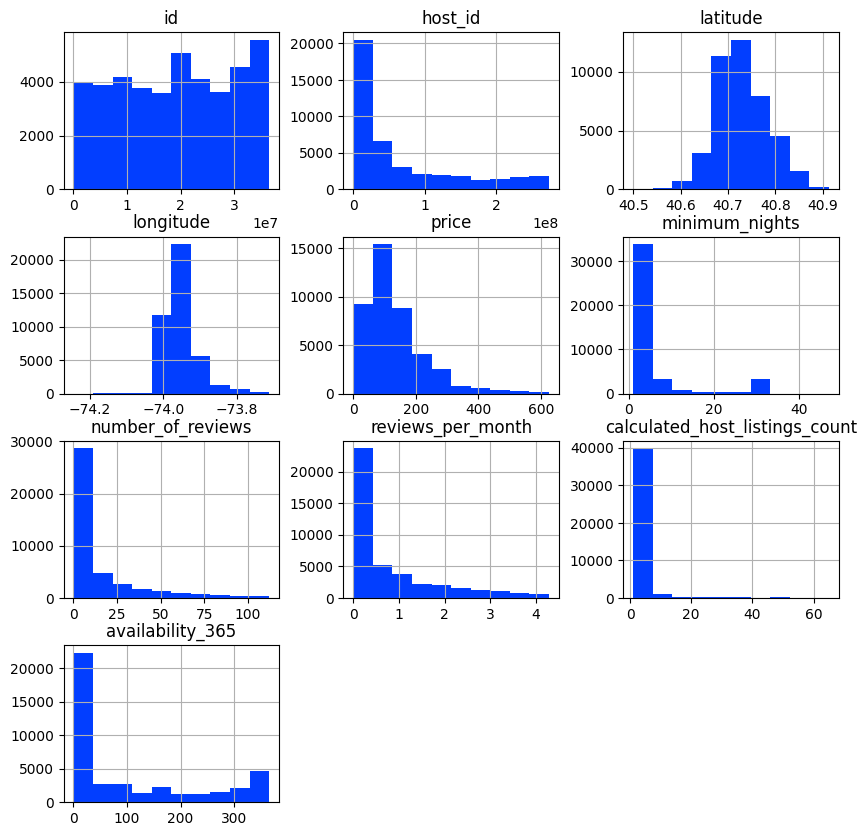

In [1517]:
NY_dataset_wo.hist(figsize=(10,10))
plt.show()

In [1518]:
NY_dataset_wo.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42307.000,19065546.599,10786414.195,2539.000,9682880.000,19691525.000,28778296.500,36487245.000
host_id,42307.000,65849921.331,77497203.819,2438.000,7662669.000,29899972.000,103220478.500,274321313.000
latitude,42307.000,40.729,0.055,40.500,40.690,40.722,40.763,40.913
longitude,42307.000,-73.952,0.045,-74.244,-73.982,-73.955,-73.936,-73.713
price,42307.000,132.867,93.982,0.000,67.000,100.000,170.000,625.000
minimum_nights,42307.000,5.558,8.055,1.000,2.000,3.000,5.000,47.000
number_of_reviews,42307.000,14.536,22.514,0.000,1.000,4.000,18.000,112.000
reviews_per_month,42307.000,0.773,1.012,0.000,0.030,0.300,1.120,4.280
calculated_host_listings_count,42307.000,2.710,6.116,1.000,1.000,1.000,2.000,65.000
availability_365,42307.000,101.536,129.128,0.000,0.000,24.000,188.000,365.000


<h4><b>Correlations</b></h4>

In [1519]:
#Get correlation between different numeric features
corr = NY_dataset_wo[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000,-0.001,-0.024,-0.017,0.010,0.075
minimum_nights,-0.001,1.000,-0.115,-0.188,0.404,0.223
number_of_reviews,-0.024,-0.115,1.000,0.602,-0.054,0.194
reviews_per_month,-0.017,-0.188,0.602,1.000,-0.047,0.200
calculated_host_listings_count,0.010,0.404,-0.054,-0.047,1.000,0.318
availability_365,0.075,0.223,0.194,0.200,0.318,1.000


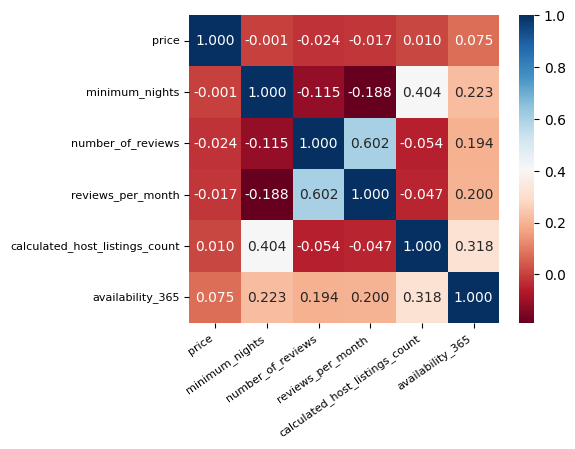

In [1520]:
plt.figure(figsize=(5,4))
heatmap = sns.heatmap(corr, cmap='RdBu', fmt='.3f', annot=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
plt.xticks(rotation=35, ha='right')
plt.show()

The variables do not seem to be significantly correlated to each other except 'number_of_reviews' and 'reviews_per_month'.

<h3><b>Plots</b></h3>

<h5><b>Price</b></h5>

In [1521]:
NY_dataset_wo.price.value_counts().iloc[:10]


150    1903
100    1875
50     1393
200    1322
60     1320
75     1242
80     1137
65     1065
70     1054
120    1014
Name: price, dtype: int64

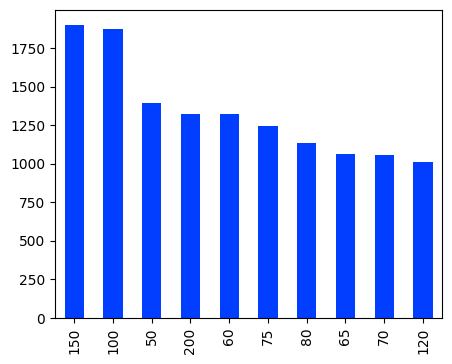

In [1522]:
plt.figure(figsize = (5,4))
NY_dataset_wo.price.value_counts().iloc[:10].plot(kind = 'bar') # The command generates a bar graph of the 10 most frequent values in the 'price' column.
plt.show()

More then 1750 airbnbs has a price of 150 dollars and 100 dollars each respectively.

Around 1350 airbnbs have around 50 dollars price.

In [1523]:
NY_dataset_wo.price.describe()

count   42307.000
mean      132.867
std        93.982
min         0.000
25%        67.000
50%       100.000
75%       170.000
max       625.000
Name: price, dtype: float64

The average pricing is around 133 dollars.

50% of data has price greater than 100 dollars.

The the most expensive airbnb has 625 dollars as price.

<h5><b>Minimum nights</b></h5>

In [1524]:
for i in range(1,11):
  print("Number of nights: ", i)
  print("Count:", len(NY_dataset_wo[NY_dataset_wo['minimum_nights'] == i])) # The cycle show us how many airbnbs have n as minimum night, with n = 1, 2.. , 10.

Number of nights:  1
Count: 10480
Number of nights:  2
Count: 10106
Number of nights:  3
Count: 7247
Number of nights:  4
Count: 3096
Number of nights:  5
Count: 2911
Number of nights:  6
Count: 727
Number of nights:  7
Count: 2009
Number of nights:  8
Count: 130
Number of nights:  9
Count: 80
Number of nights:  10
Count: 473


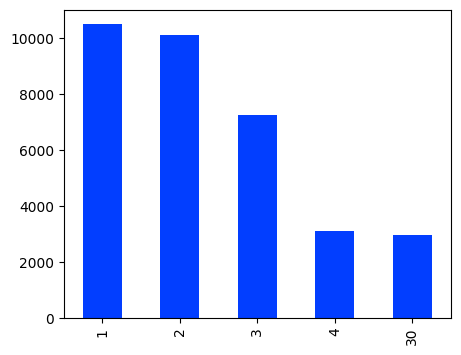

In [1525]:
plt.figure(figsize = (5,4))
NY_dataset_wo['minimum_nights'].value_counts().iloc[:5].plot(kind = 'bar')
plt.show()

Almost 10k people stay 1 night in airbnb and 3.5k have choosen to stay a month.

<h5><b>Number of reviews</b></h5>

In [1526]:
NY_dataset_wo['number_of_reviews'].value_counts()

0      8925
1      4927
2      3297
3      2428
4      1916
       ... 
101      30
109      27
112      24
111      24
110      22
Name: number_of_reviews, Length: 113, dtype: int64

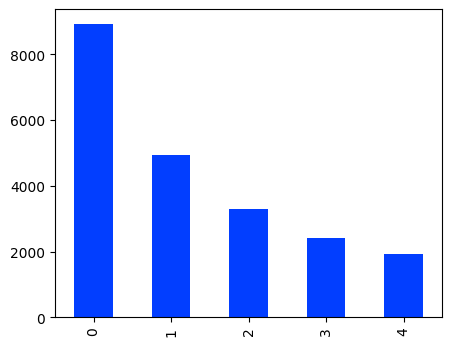

In [1527]:
plt.figure(figsize = (5,4))
NY_dataset_wo['number_of_reviews'].value_counts().iloc[:5].plot(kind = 'bar')
plt.show()

We can see that many airbnbs do not have reviews.

<h5><b>Availability</b></h5>

In [1528]:
NY_dataset_wo['availability_365'].value_counts()

0      17032
365     1051
364      428
1        353
89       329
       ...  
214       20
183       20
206       18
196       16
202       13
Name: availability_365, Length: 366, dtype: int64

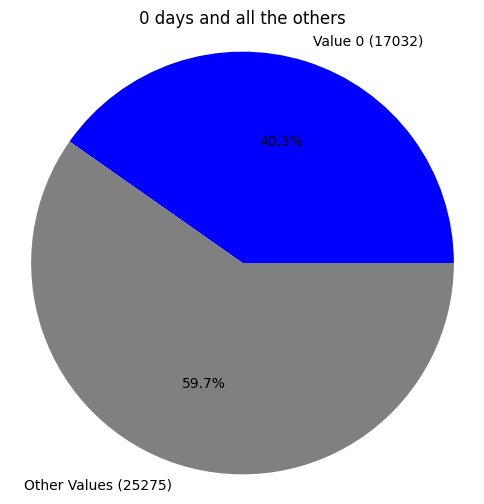

In [1529]:
value_counts = NY_dataset_wo['availability_365'].value_counts()
value_0 = value_counts.iloc[0] # I take the value 0 because is the max
other_values_sum = sum(value_counts.values) - value_0 # take the sum of all the other values

values = [value_0, other_values_sum]
labels = [f'Value 0 ({value_0})', f'Other Values ({other_values_sum})']
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'gray'])
plt.axis('equal')
plt.title("0 days and all the others")
plt.show()

It is instersting that 40.3% of all airbnbs have 0 days availability. This data might seem unusual, but upon further investigation, it can be understood that Airbnb accommodations can also be booked for extended periods, likely for work or study purposes, and are paid as monthly rents.

<h5><b>Neighborhood_group</b></h5>

Manhattan        18085
Brooklyn         18084
Queens            4862
Bronx              955
Staten Island      321
Name: neighbourhood_group, dtype: int64




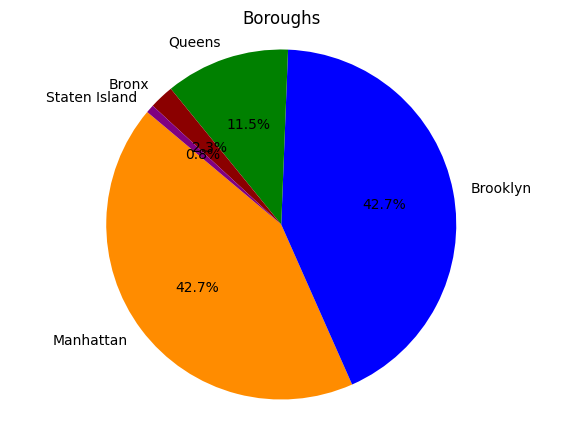

In [1560]:
# Calculating the number of Airbnbs for each boroughs
neighbourhood = NY_dataset_wo['neighbourhood_group'].value_counts()

# Displaying the results
print(neighbourhood)
print('\n')

# Plotting the pie plot of room type
plt.figure(figsize=(7, 5))
plt.pie(neighbourhood, labels = neighbourhood.index, colors = ['darkorange', 'blue', 'green', 'darkred', 'purple'], autopct='%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('Boroughs')
plt.show()

<h5><b>Room_type</b></h5>

Entire home/apt    21365
Private room       19878
Shared room         1064
Name: room_type, dtype: int64




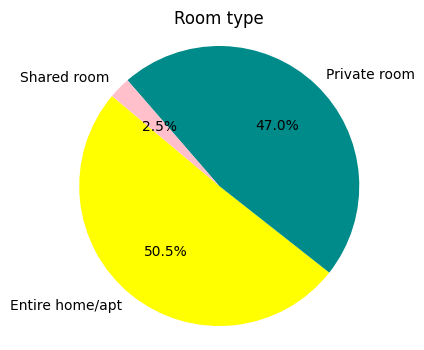

In [1531]:
# Calculating the number of rooms for each room type
room_type = NY_dataset_wo['room_type'].value_counts()

# Displaying the results
print(room_type)
print('\n')

# Plotting the pie plot of room type
plt.figure(figsize=(5, 4))
plt.pie(room_type, labels = room_type.index, colors = ['yellow', 'darkcyan', 'pink'], autopct='%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('Room type')
plt.show()

room_type
Entire home/apt   182.843
Private room       82.826
Shared room        64.235
Name: price, dtype: float64




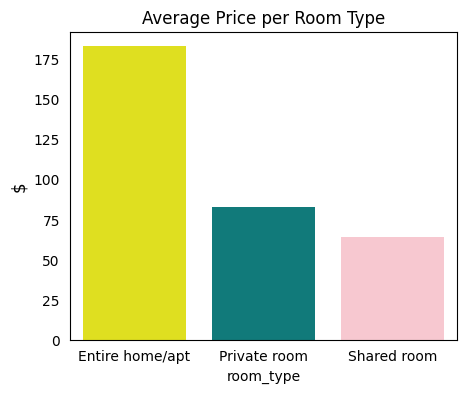

In [1532]:
# Calculating the average price per room type
type_price = NY_dataset_wo.groupby('room_type').price.mean().sort_values(ascending=False)

# Displaying the results
print(type_price)
print('\n')

# Plottingthe average price per room type
plt.figure(figsize=(5, 4))
ax = sns.barplot(x = type_price.index, y = type_price, palette = ['yellow', 'darkcyan', 'pink']) 
ax.set_title('Average Price per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('$', fontsize=12)
plt.show()

In [1533]:
# Calculating the average price per region
price_boroughs = NY_dataset_wo.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

# Displaying the results
print(price_boroughs)
print('\n')

# Plotting the average price per region
ax = sns.barplot(x = price_boroughs.index, y = price_boroughs, palette=['darkorange', 'blue', 'green', 'purple', 'darkred', ]) 
ax.set_title('Average Price per Borough')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)

neighbourhood_group
Manhattan       164.706
Brooklyn        114.301
Queens           95.724
Staten Island    94.801
Bronx            83.403
Name: price, dtype: float64




Text(0, 0.5, '$')

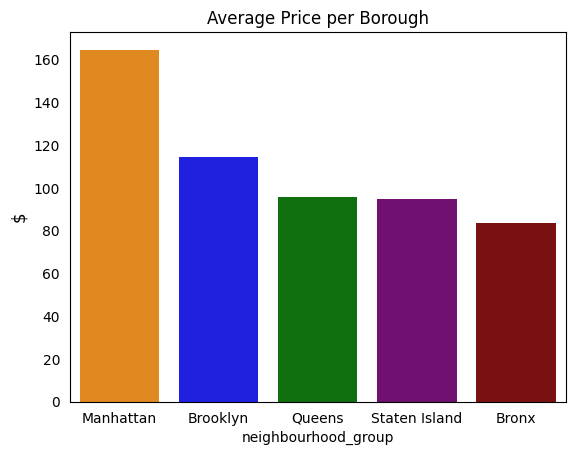

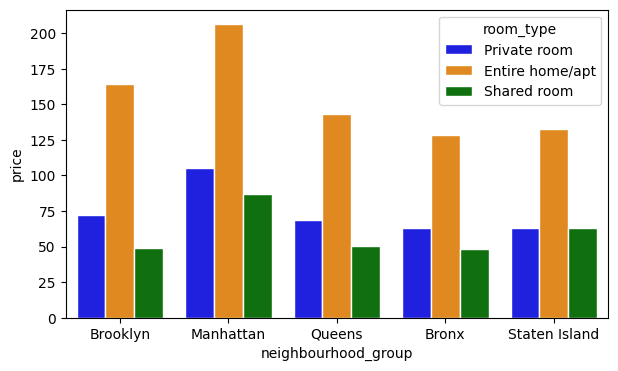

In [1534]:
plt.figure(figsize=(7, 4))
sns.barplot(x=NY_dataset_wo.neighbourhood_group, y=NY_dataset_wo.price, hue=NY_dataset_wo.room_type, errorbar=None, edgecolor='white', palette = ['blue', 'darkorange', 'green'] )
plt.show()

As we can see, Manhattan is the most expensive neighbourhood and the price of entire home/apt is more than any other room type.

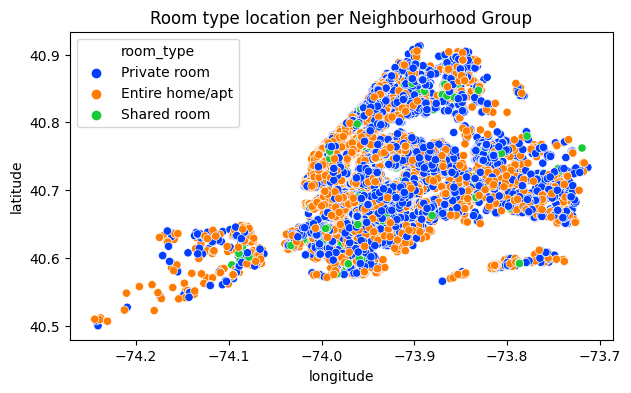

In [1535]:
# Scatterplot to viusalize the room_type of all the Airbnb
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(7,4))
sns.scatterplot(x = NY_dataset_wo.longitude, y =NY_dataset_wo.latitude,hue=NY_dataset_wo.room_type, palette = 'bright').set_title(title)
plt.show()

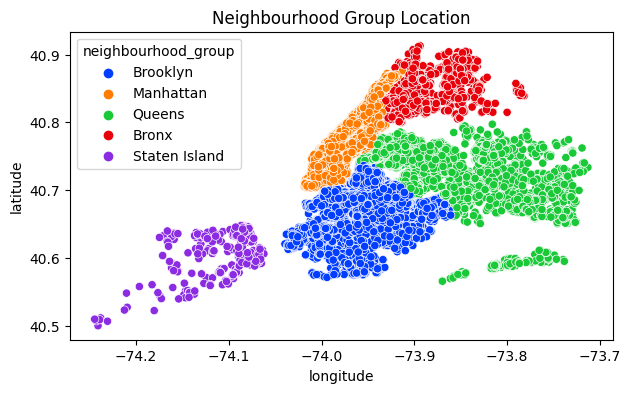

In [1536]:
# Scatterplot to viusalize the locations of all the Airbnb
title = 'Neighbourhood Group Location'
plt.figure(figsize=(7, 4))
sns.scatterplot(x=NY_dataset_wo.longitude,y=NY_dataset_wo.latitude, hue=NY_dataset_wo.neighbourhood_group, palette = 'bright').set_title(title)
plt.show()

With all these plots, the conclusions are:

- Entire home/apt and private room are the most common room types;
- Entire home/apt are usually more expensive than private and shared rooms;
- Over 85% of the rooms are located in Manhattan and Brooklyn, which are also the most expensive regions, especially Manhattan;

<h3><b>Regression analysis to predict the price</b></h3>

In [1537]:
NY_dataset_wo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42307 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42307 non-null  int64  
 1   host_id                         42307 non-null  int64  
 2   neighbourhood_group             42307 non-null  object 
 3   neighbourhood                   42307 non-null  object 
 4   latitude                        42307 non-null  float64
 5   longitude                       42307 non-null  float64
 6   room_type                       42307 non-null  object 
 7   price                           42307 non-null  int64  
 8   minimum_nights                  42307 non-null  int64  
 9   number_of_reviews               42307 non-null  int64  
 10  reviews_per_month               42307 non-null  float64
 11  calculated_host_listings_count  42307 non-null  int64  
 12  availability_365                

In [1538]:
#Regression analysis to predict the price
NY_final = NY_dataset_wo.drop(['id','host_id','latitude','longitude','neighbourhood'], axis = 1, inplace = False)
x = NY_final.iloc[:,[0,1,3,4,5,6,7]]
y = NY_final['price']
x


,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,1,9,0.210,6,365
1,Manhattan,Entire home/apt,1,45,0.380,2,355
2,Manhattan,Private room,3,0,0.000,1,365
4,Manhattan,Entire home/apt,10,9,0.100,1,0
5,Manhattan,Entire home/apt,3,74,0.590,1,129
...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,2,0,0.000,2,9
48891,Brooklyn,Private room,4,0,0.000,2,36
48892,Manhattan,Entire home/apt,10,0,0.000,1,27
48893,Manhattan,Shared room,1,0,0.000,6,2


I dropped these columns as they are not useful for the analysis. Specifically, knowing the property's ID and owner's ID might be essential if I were to create a database, but not for analyzing the Airbnb price per night. As for the other columns, I consider them to be too specific, and the 'neighborhood_group' column, in my opinion, is adequate for the analysis.

In [1539]:
#One-Hot Encoding
X = pd.get_dummies(NY_final.iloc[:,[0,1,3,4,5,6,7]], prefix=['neighbourhood_group', 'room_type'], drop_first=True) 
#Drop_first = True; indicates that one of the categories of each categorical variable must be left out to avoid the so-called "dummy variable trap". Dummy variable trap occurs when dummy variables are highly correlated.
X

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,1,9,0.210,6,365,1,0,0,0,1,0
1,1,45,0.380,2,355,0,1,0,0,0,0
2,3,0,0.000,1,365,0,1,0,0,1,0
4,10,9,0.100,1,0,0,1,0,0,0,0
5,3,74,0.590,1,129,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,2,0,0.000,2,9,1,0,0,0,1,0
48891,4,0,0.000,2,36,1,0,0,0,1,0
48892,10,0,0.000,1,27,0,1,0,0,0,0
48893,1,0,0.000,6,2,0,1,0,0,0,1


I encoded the values of the 'room_type' and 'neighborhood_group' columns because they contain categorical data, rather than numerical data. To achieve this, I utilized the get_dummies method from the Pandas library.

Get_dummies is a method that convert categorical variable into dummy/indicator variables. Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value.

You have to pay attention when you are encoding such data, as it's not always possible to assign values from 0 to n, where n represents the number of different categories in the column. To achieve this, there needs to be some form of ordinal relationship among the data, which is not present in this case.

In [1540]:
#Splitting the dataset into test and training data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 42)

In [1541]:
print('Training predictor matrix dimensions: {}'.format(X_train.shape))
print('Training target vector dimensions: {}'.format(y_train.shape))
print('Test predictor matrix dimensions: {}'.format(X_test.shape))
print('Test target vector dimensions: {}'.format(y_test.shape))

Training predictor matrix dimensions: (33845, 11)
Training target vector dimensions: (33845,)
Test predictor matrix dimensions: (8462, 11)
Test target vector dimensions: (8462,)


<h4><b>Linear Regression Model</b></h4>

R2 score:  0.38123833956724984
RMSE:  72.93850862142595


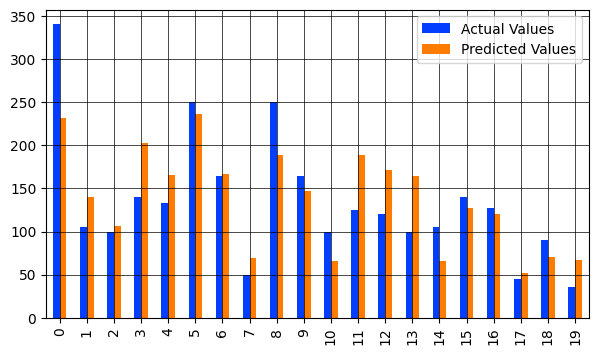

In [1542]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

#R2 score
print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth = '0.5', color = 'black')
plt.show()

We can see that the value of the R^2 is low. So now I am going to check if I can improve that value using different methods.

R^2 represents the proportion of the variance for a dependent variable that's explained by an independent variable.

<h3><b>Ridge</b></h3>

In [1543]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

With ridge regression you must standardize the data before.

R2 score:  0.3810616778098658
RMSE:  72.94892016301212


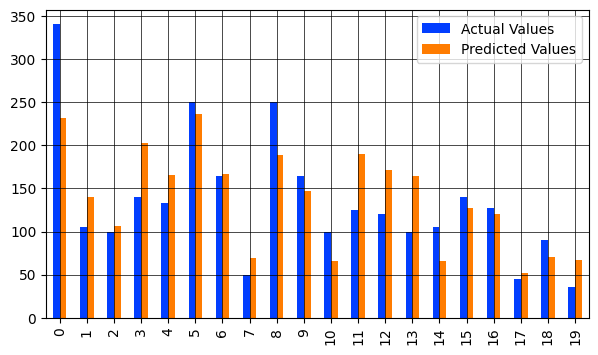

In [1544]:
regL1 = Ridge(alpha=0.01)
regL1.fit(X_train, y_train) 
y_pred=regL1.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth='0.5', color='black')
plt.show()

There are no particular changes.

<h3><b>Regression Tree</b></h3>

R2 score:  0.4005446536302263
RMSE:  71.79159461449368


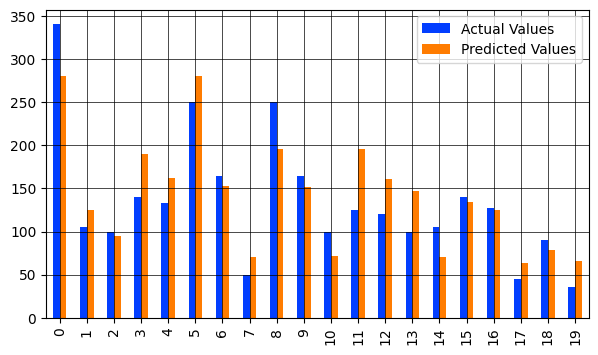

In [1545]:
Decision_Tree=DecisionTreeRegressor(min_samples_leaf=.01)
Decision_Tree.fit(X_train,y_train)
y_pred=Decision_Tree.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth='0.5', color='black')
plt.show()

With this method the R^2 is somewhat improved.

<h3><b>Random Forest</b></h3>

R2 score:  0.4218900299685221
RMSE:  70.50183333068286


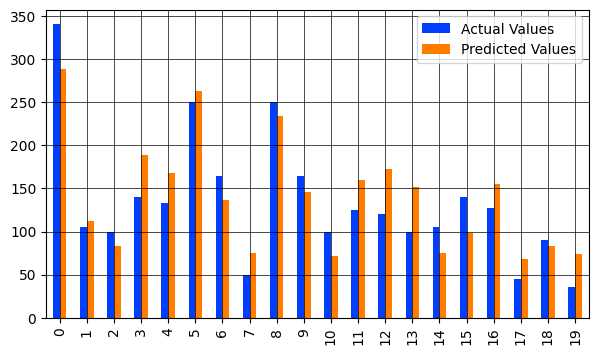

In [1546]:
Random_forest = RandomForestRegressor(n_estimators=200, max_depth = 45, min_samples_leaf = 20)
#n_estimators indicates the number of decision trees to be built 
#max_depth controls the maximum depth of the tree. Setting a value for max_depth helps to avoid overfitting
#min_samples_leaf specifies the minimum number of samples required in a leaf of the tree. This helps to avoid too small splits that could lead to overfitting.
Random_forest.fit(X_train, y_train)
y_pred=Random_forest.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth='0.5', color='black')
plt.show()

<h3><b>Gradient Boosting</b></h3>

R2 score:  0.42408359790725547
RMSE:  70.36795089576074


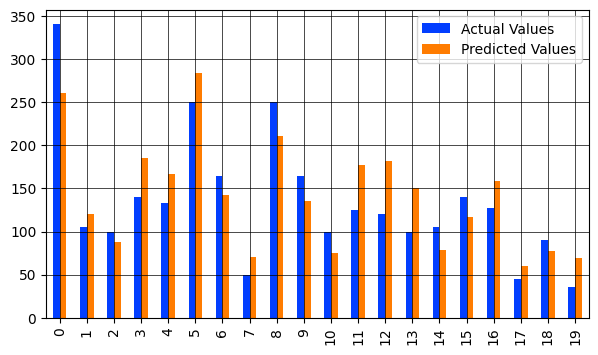

In [1547]:
Gradient_Boost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
Gradient_Boost.fit(X_train,y_train)
y_pred=Gradient_Boost.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth='0.5', color='black')
plt.show()

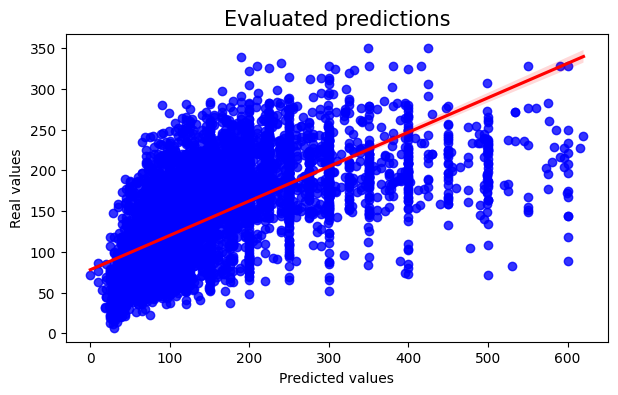

In [1548]:
plt.figure(figsize=(7,4))
sns.regplot(y=y_pred, x=y_test, line_kws={"color": "red"}, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

Now the R^2 is around 0.424 and RMSE is around 70 using Gradient Boosting method. Let’s see if we can do better.

<h5><b>Data filtering</b></h5>

In [1549]:
# Filter the dataset for prices lower than $249
X_low = X.loc[(NY_dataset_wo['price'] < 249)]
y_low = y.loc[(NY_final['price'] < 249)]
# Filter the dataset for prices above $249
#X_high = X.loc[(NY_dataset_wo['price'] > 249)]
#y_high = y.loc[(NY_final['price'] > 249)]


I split the dataset by price to see if I can increase the R^2 using a smaller portion of the dataset. I chose $249 to have around 90% of the data

<h4><b>Model with prices under $249</b></h4>

In [1550]:
#Splitting the dataset into test and training data
X_train_low, X_test_low, y_train_low, y_test_low =  train_test_split(X_low, y_low,test_size = 0.2, random_state= 42)

In [1551]:
print('Training predictor matrix dimensions: {}'.format(X_train_low.shape))
print('Training target vector dimensions: {}'.format(y_train_low.shape))
print('Test predictor matrix dimensions: {}'.format(X_test_low.shape))
print('Test target vector dimensions: {}'.format(y_test_low.shape))

Training predictor matrix dimensions: (29983, 11)
Training target vector dimensions: (29983,)
Test predictor matrix dimensions: (7496, 11)
Test target vector dimensions: (7496,)


<h3><b>Linear Regression</b></h3>

R2 score:  0.5036940709383766
RMSE:  37.46800724920818


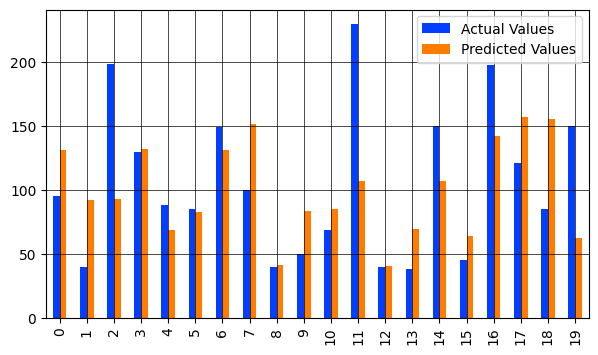

In [1552]:
reg=LinearRegression()
reg.fit(X_train_low,y_train_low)
y_pred_low=reg.predict(X_test_low)

#R2 score
print("R2 score: ",r2_score(y_test_low,y_pred_low))
print("RMSE: ",np.sqrt(mean_squared_error(y_test_low,y_pred_low)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_low).flatten(), 'Predicted Values': y_pred_low.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth = '0.5', color = 'black')
plt.show()

In [1553]:
scaler = StandardScaler()
X_train_low = scaler.fit_transform(X_train_low)
X_test_low = scaler.fit_transform(X_test_low)

<h3><b>Ridge</b></h3>

R2 score:  0.5029352928601387
RMSE:  37.49663782049032


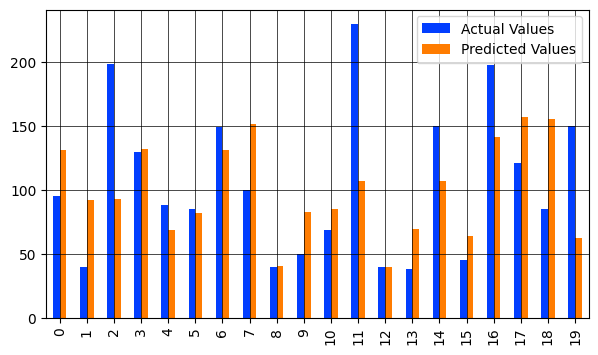

In [1554]:
regL1 = Ridge(alpha=0.01)
regL1.fit(X_train_low, y_train_low) 
y_pred_low=regL1.predict(X_test_low)

print("R2 score: ",r2_score(y_test_low,y_pred_low))
print("RMSE: ",np.sqrt(mean_squared_error(y_test_low,y_pred_low)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_low).flatten(), 'Predicted Values': y_pred_low.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth='0.5', color='black')
plt.show()

<h3><b>Regression Tree</b></h3>

R2 score:  0.5082478796321501
RMSE:  37.295719034506654


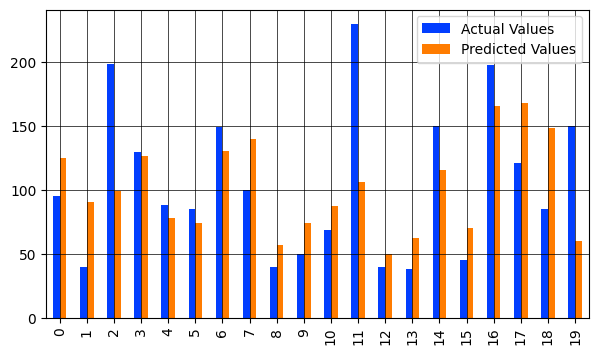

In [1555]:
Decision_Tree=DecisionTreeRegressor(min_samples_leaf=.01)
Decision_Tree.fit(X_train_low,y_train_low)
y_pred_low=Decision_Tree.predict(X_test_low)

print("R2 score: ",r2_score(y_test_low,y_pred_low))
print("RMSE: ",np.sqrt(mean_squared_error(y_test_low,y_pred_low)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_low).flatten(), 'Predicted Values': y_pred_low.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth='0.5', color='black')
plt.show()

<h3><b>Random Forest</b></h3>

R2 score:  0.52237250690805
RMSE:  36.75619294825205


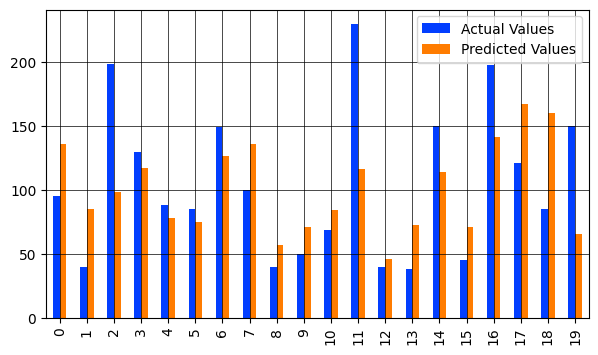

In [1556]:
Random_forest = RandomForestRegressor(n_estimators=200, max_depth = 45, min_samples_leaf = 20)
Random_forest.fit(X_train_low, y_train_low)
y_pred_low=Random_forest.predict(X_test_low)

print("R2 score: ",r2_score(y_test_low,y_pred_low))
print("RMSE: ",np.sqrt(mean_squared_error(y_test_low,y_pred_low)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_low).flatten(), 'Predicted Values': y_pred_low.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth='0.5', color='black')
plt.show()

<h3><b>Gradient Boosting</b></h3>

R2 score:  0.5214381228198031
RMSE:  36.792128506535356


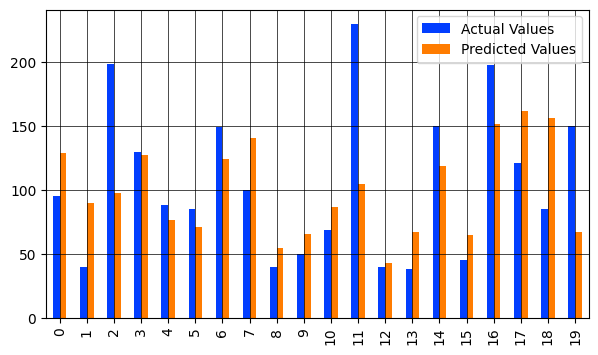

In [1557]:
Gradient_Boost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
Gradient_Boost.fit(X_train_low,y_train_low)
y_pred_low=Gradient_Boost.predict(X_test_low)

print("R2 score: ",r2_score(y_test_low,y_pred_low))
print("RMSE: ",np.sqrt(mean_squared_error(y_test_low,y_pred_low)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_low).flatten(), 'Predicted Values': y_pred_low.flatten()})

#Visualize
df1 = error_diff.head(20)
df1.plot(kind='bar',figsize=(7,4))
plt.grid(linewidth='0.5', color='black')
plt.show()

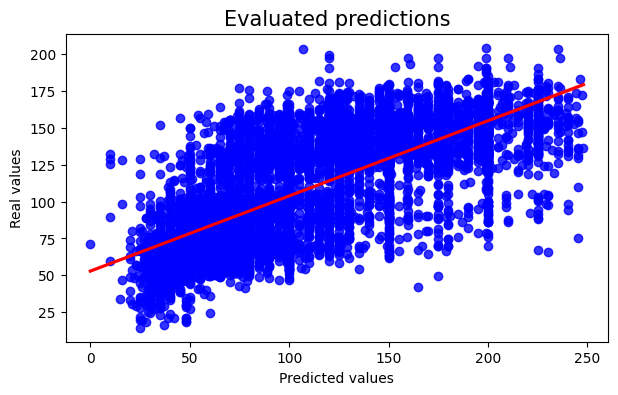

In [1558]:
plt.figure(figsize=(7,4))
sns.regplot(y=y_pred_low, x=y_test_low, line_kws={"color": "red"}, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

I used the same methods used before but in this case we have improved R^2 (0.52) and MRSE (37) values.

<h3><b>Conclusion</b></h3>

The properties in the dataset exhibit substantial variations in prices.

Dividing the dataset into different price categories proves valuable for analysis purposes.

The most significant variables for predicting prices are:
-Neighborhood_group
-Type_of_room

The models aimed at predicting prices have shown unsatisfactory performance.
-The highest achieved model score is 0.52.

Predictions tend to be more accurate for properties priced under $249, which constitutes around 90% of the dataset.

The utilization of categorical encoding for the data didn't lead to an improvement in model performance.

The dataset suffers from inadequate data quality, with a notable challenge being the uneven distribution of features. This has posed difficulties in constructing an effective predictive model.

Exploring deeper into the underlying problem and augmenting the dataset with additional valuable features that demonstrate stronger correlations with the target variable could potentially lead to improved price predictions.